# Extract thông tin tài chính từ tin tức dùng VectorStoreIndex base

https://arxiv.org/pdf/2310.11511

![Screen Shot 2024-10-23 at 08.53.33.png](<attachment:Screen Shot 2024-10-23 at 08.53.33.png>)

- Giải thích hay
https://ai.gopubby.com/advanced-rag-08-self-rag-c0c5b5952e0e
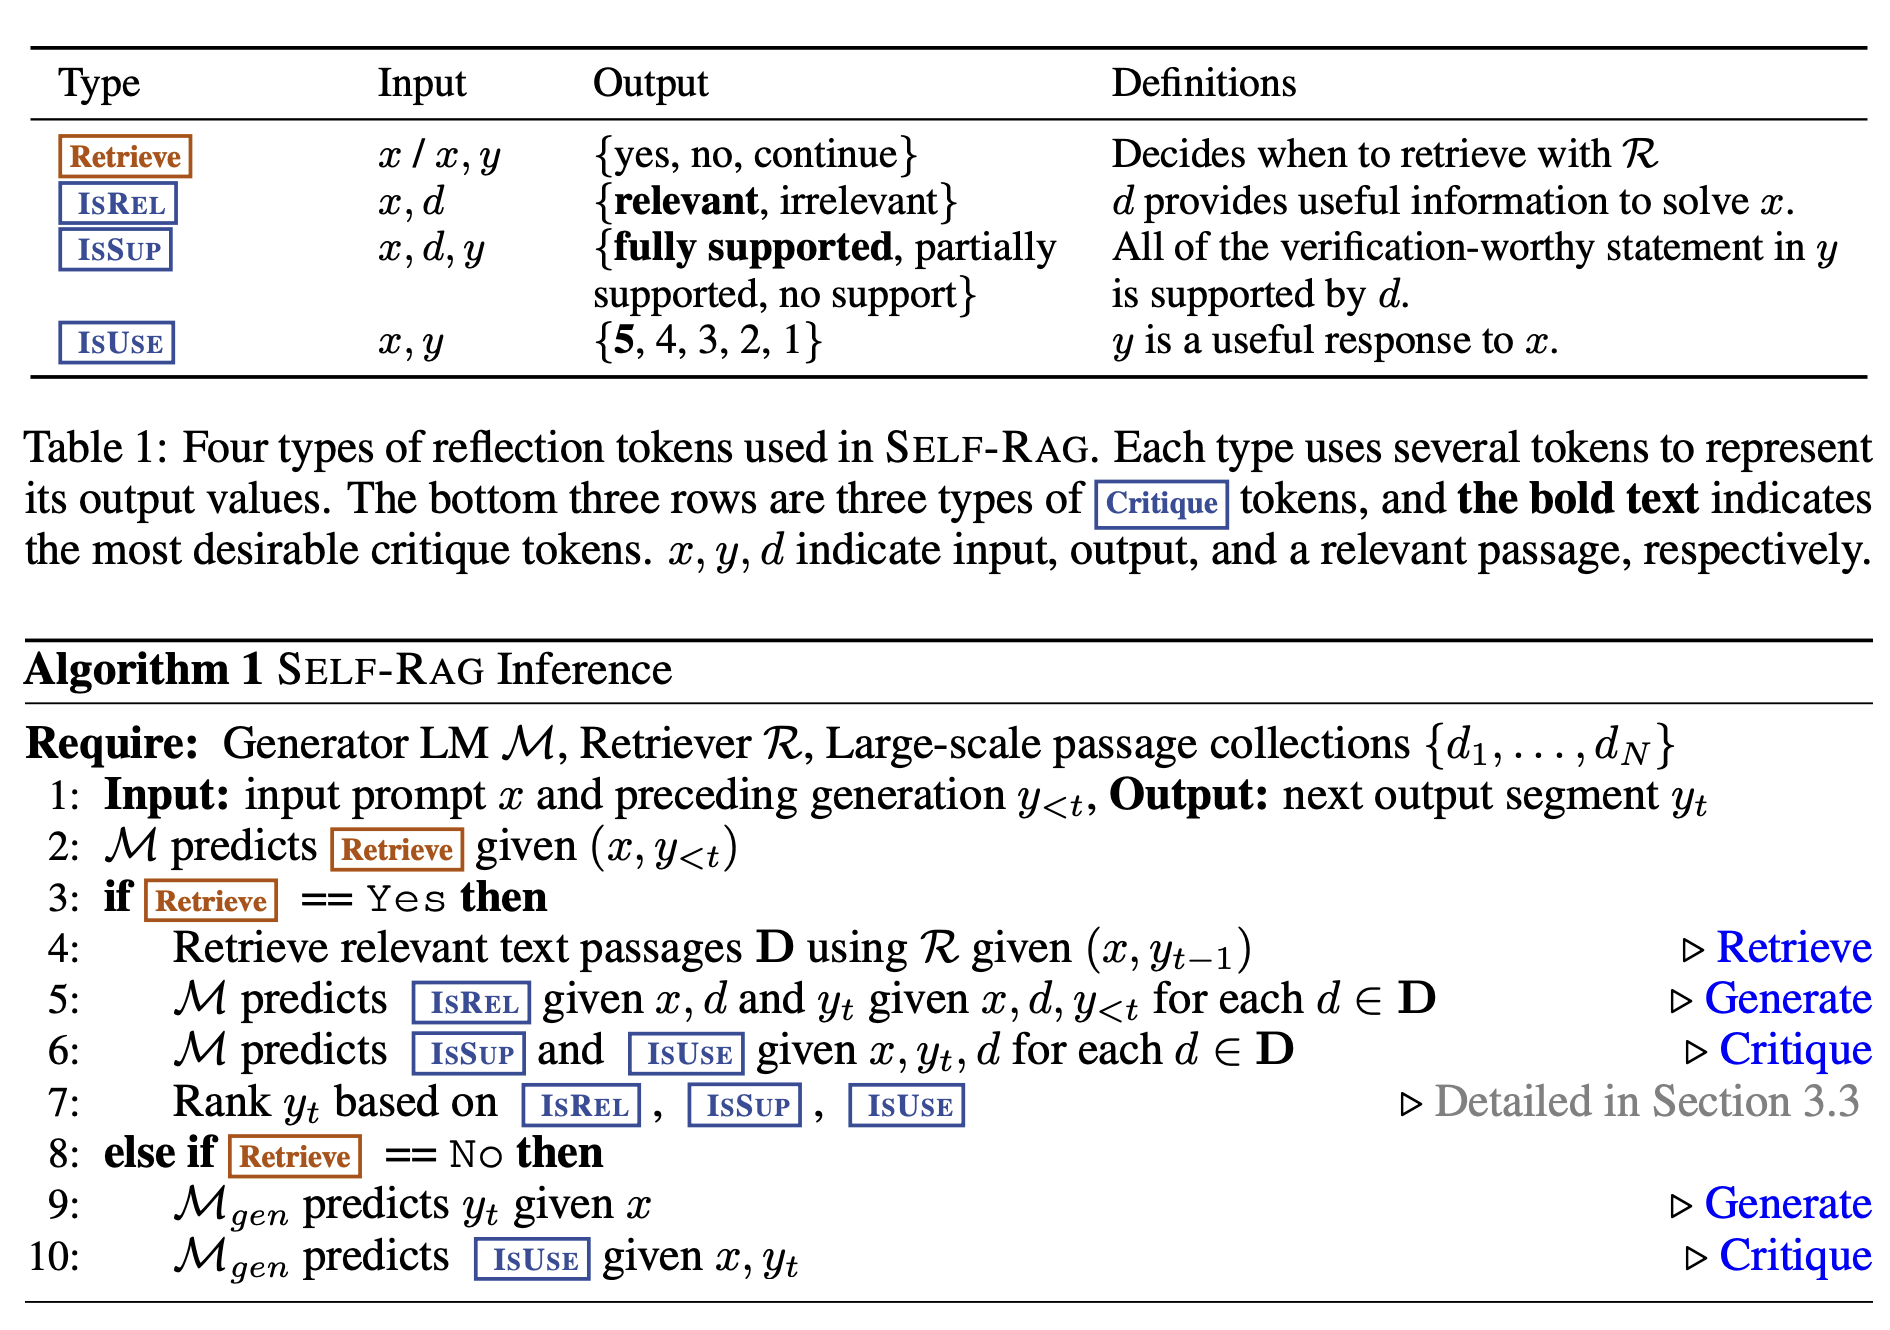

https://neo4j.com/labs/genai-ecosystem/llamaindex/


In [1]:
from dotenv import load_dotenv
import os
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Settings

import nest_asyncio
nest_asyncio.apply()
# Install the python-dotenv package if not already installed
%pip install python-dotenv

# Load the .env file

load_dotenv('../.env')

# Access the OpenAI key
openai_key = os.getenv("OPENAI_API_KEY")

llm = OpenAI(model="gpt-4o-mini", api_key=openai_key)
embed_model = OpenAIEmbedding(model="text-embedding-3-small")

Settings.llm = llm
Settings.embed_model = embed_model

FOLDER_DATA = "../data/bao-chi"

Note: you may need to restart the kernel to use updated packages.


In [2]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core import PropertyGraphIndex
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI

from llama_index.graph_stores.neo4j import Neo4jPropertyGraphStore

documents = SimpleDirectoryReader(FOLDER_DATA).load_data()
print("length of documents:", len(documents))
print('documents:', documents[1])



length of documents: 24
documents: Doc ID: 47c36be5-66c8-47b1-aadb-84573ca639b1
Text: Khối ngoại bất ngờ có tuần bán ròng hơn 2.000 tỷ, cổ phiếu “đại
gia” công nghệ số 1 Việt Nam dẫn đầu danh sách xả hàng


In [3]:
from llama_index.core import VectorStoreIndex

vector_index = VectorStoreIndex(documents, embed_model)
query_engine = vector_index.as_query_engine()

In [6]:
test_pairs = [
    # ("Hoàng Anh Gia Lai (HAG) báo lãi sau thuế năm 2022 bao nhiêu ?", "quý 3 hơn 350 tỷ đồng"),
    # ("Ai đã Bán Ròng Hơn 2.000 Tỷ ?", "Khối Ngoại Bán Ròng Hơn 2.000 Tỷ"),
    ("Khối ngoại đã mua mạnh và xả mạnh những mã cổ phiếu nào ?", "bán ròng mạnh nhất tại cổ phiếu FPT, HDB và MSB ")
    # ("lãi sau thuế của Chứng khoán LPBank ?", "Tăng 275% so với cùng kỳ năm trước"),
    # ("thu gom cố phiếu MSN?", "Khối ngoại cũng giải ngân mua ròng 179 tỷ tại cổ phiếu MSN"),
    # ("Doanh thu Bia Sài Gòn - Quảng Ngãi (BSQ) trong BCTC quý 3/2024 ?", "Bia Sài Gòn - Quảng Ngãi (BSQ) ghi nhận doanh thu 418 tỷ đồng"),
    # ("Lực mua ròng các cổ phiếu nào ?", "ACV', 'YEG', 'TCB', 'TPB', 'MWG'"),
    # ("VEFAC là công ty con của ?", "VIC")
]

for question, expected_answer in test_pairs:
    response = query_engine.query(question)
    print(f"Question: {question}")
    print(f"Expected Answer: {expected_answer}")
    print(f"Actual Answer: {response.response}")
    print()

Question: Khối ngoại đã mua mạnh và xả mạnh những mã cổ phiếu nào ?
Expected Answer: bán ròng mạnh nhất tại cổ phiếu FPT, HDB và MSB 
Actual Answer: Khối ngoại đã mua mạnh cổ phiếu STB với giá trị 221 tỷ đồng, MSN với 179 tỷ đồng, và NTL với 95 tỷ đồng. Đồng thời, khối ngoại xả mạnh cổ phiếu FPT với giá trị 364 tỷ đồng, HDB với 220 tỷ đồng, và MSB với 169 tỷ đồng.



## Kết luận.

Hóa ra loại cơ bản nhất lại chính xác nhất :v